In [60]:
# Import datas 
#nltk.download('stopwords')
#nltk.download('punkt')

In [61]:
pip install spacy

In [62]:
#pip install wordcloud


In [63]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import re
import spacy
import string
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk import PorterStemmer, LancasterStemmer, SnowballStemmer
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [64]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
#df_sample = pd.read_csv('sample_submission.csv')

In [65]:
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [66]:
df_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [67]:
#df_sample.head()

In [68]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [69]:
df_train['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [70]:
# Basic stats
print("Number of rows : {}".format(df_train.shape[0]))
print()

print("Display of dataset: ")
display(df_train.head())
print()

print("Basics statistics: ")
data_desc = df_train.describe(include='all')
display(data_desc)
print()

print("Percentage of missing values: ")
display(100*df_train.isnull().sum()/df_train.shape[0])

Number of rows : 7613

Display of dataset: 


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1



Basics statistics: 


,id,keyword,location,text,target
count,7613.000000,7552,5080,7613,7613.00000
unique,NaN,221,3341,7503,NaN
top,NaN,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...,NaN
freq,NaN,45,104,10,NaN
mean,5441.934848,NaN,NaN,NaN,0.42966
std,3137.116090,NaN,NaN,NaN,0.49506
min,1.000000,NaN,NaN,NaN,0.00000
25%,2734.000000,NaN,NaN,NaN,0.00000
50%,5408.000000,NaN,NaN,NaN,0.00000
75%,8146.000000,NaN,NaN,NaN,1.00000



Percentage of missing values: 


id           0.000000
keyword      0.801261
location    33.272035
text         0.000000
target       0.000000
dtype: float64

In [71]:
df_train.drop_duplicates(subset='text',inplace=True)
print("Number of rows : {}".format(df_train.shape[0]))
print()

Number of rows : 7503



In [72]:
df_train.dtypes


id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

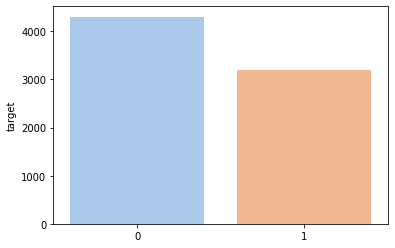

In [73]:
Viz1= df_train['target'].value_counts().to_frame()

## seaborn barplot to display barchart
sns.barplot(data=Viz1,x=Viz1.index,y="target",palette="pastel")


In [74]:
df_train['target'].value_counts(normalize=True)

0    0.57377
1    0.42623
Name: target, dtype: float64

In [75]:

import plotly.express as px

Viz= df_train['target'].value_counts()
df = Viz1
 
fig = px.pie(df, values= Viz,
             names=df.index,
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [76]:
df_train['text'].nunique()

7503

In [77]:
df_train.groupby('id').location.nunique().sort_values(ascending= False)

id
2708    1
1672    1
1676    1
5928    1
2528    1
       ..
5448    0
5432    0
5425    0
5418    0
1       0
Name: location, Length: 7503, dtype: int64

In [78]:
df_train.groupby('id').id.nunique().sort_values(ascending= False).head(20)

id
10873    1
3635     1
3619     1
3621     1
3623     1
3625     1
3626     1
3627     1
3628     1
3629     1
3631     1
3632     1
3633     1
3634     1
3636     1
3653     1
3637     1
3638     1
3639     1
3640     1
Name: id, dtype: int64

In [79]:
df_loc = df_train.location.value_counts().to_frame()
df_loc

,location
USA,104
New York,71
United States,50
London,45
Canada,29
...,...
"Bandar Lampung, Indonesia",1
Malibu/SantaFe/Winning!,1
"Pioneer Village, KY",1
"England, Great Britain.",1


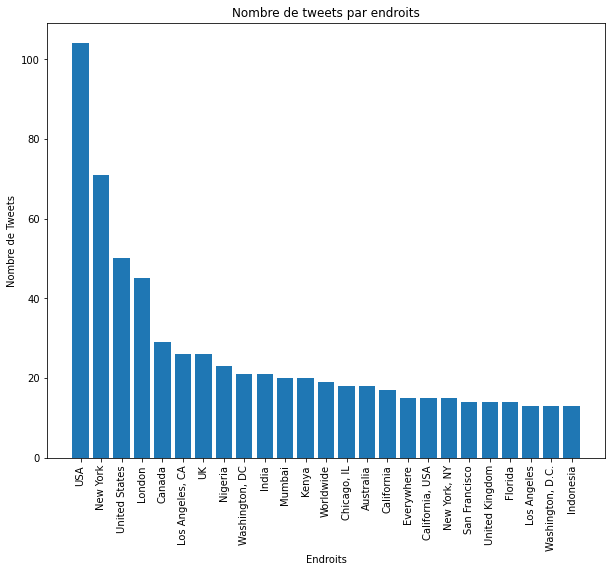

In [80]:
data = df_train.groupby('location').id.nunique().sort_values(ascending= False).head(25) 
plt.figure(figsize = (10,8))
plt.bar(data.index,data.values)
plt.title("Nombre de tweets par endroits")
plt.xticks(rotation= 90)
plt.ylabel("Nombre de Tweets")
plt.xlabel("Endroits")
plt.show()

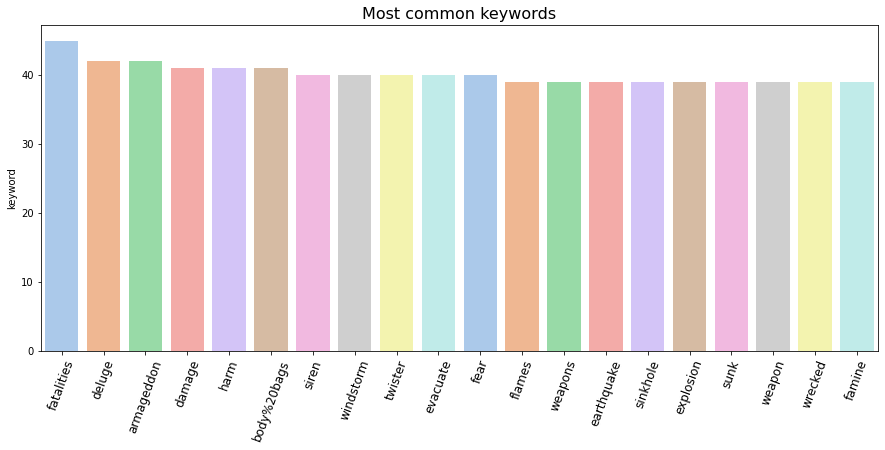

In [81]:
common_keywords=df_train["keyword"].value_counts()[:20].to_frame()
fig=plt.figure(figsize=(15,6))
sns.barplot(data=common_keywords,x=common_keywords.index,y="keyword",palette="pastel")
plt.title("Most common keywords",size=16)
plt.xticks(rotation=70,size=12);

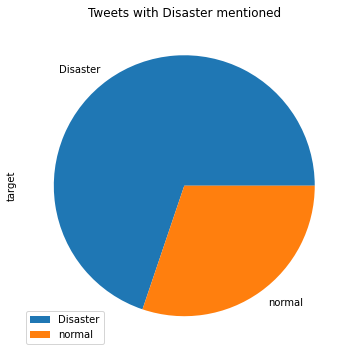

In [82]:
df_train[df_train.text.str.contains("disaster")].target.\
 value_counts().to_frame().rename(index={1:"Disaster",0:"normal"}).\
  plot.pie(y="target",figsize=(12,6),title="Tweets with Disaster mentioned");

In [83]:

test = df_train['text'][0]

nltk.word_tokenize(test)

['Our',
 'Deeds',
 'are',
 'the',
 'Reason',
 'of',
 'this',
 '#',
 'earthquake',
 'May',
 'ALLAH',
 'Forgive',
 'us',
 'all']

In [84]:
tokenizer = nltk.RegexpTokenizer(r'\w+')
tokenizer.tokenize(test)


['Our',
 'Deeds',
 'are',
 'the',
 'Reason',
 'of',
 'this',
 'earthquake',
 'May',
 'ALLAH',
 'Forgive',
 'us',
 'all']

In [85]:
import re

def nlp_pipeline(text):

    text = text.lower()
    text = text.replace('\n', ' ').replace('\r', '')
    text = ' '.join(text.split())
    text = re.sub(r"[A-Za-z\.]*[0-9]+[A-Za-z%°\.]*", "", text)
    text = re.sub(r"(\s\-\s|-$)", "", text)
    text = re.sub(r"[,\!\?\%\(\)\/\"]", "", text)
    text = re.sub(r"\&\S*\s", "", text)
    text = re.sub(r"\&", "", text)
    text = re.sub(r"\+", "", text)
    text = re.sub(r"\#", "", text)
    text = re.sub(r"\$", "", text)
    text = re.sub(r"\£", "", text)
    text = re.sub(r"\%", "", text)
    text = re.sub(r"\:", "", text)
    text = re.sub(r"\@", "", text)
    text = re.sub(r"\-", "", text)

    return text

In [86]:
df_train['text2'] = df_train['text'].apply(nlp_pipeline)
df_train

,id,keyword,location,text,target,text2
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask. canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to 'shelter in place' are ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders in...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...
...,...,...,...,...,...,...
7604,10863,NaN,NaN,#WorldNews Fallen powerlines on G:link tram: U...,1,worldnews fallen powerlines on glink tram upda...
7605,10864,NaN,NaN,on the flip side I'm at Walmart and there is a...,1,on the flip side i'm at walmart and there is a...
7606,10866,NaN,NaN,Suicide bomber kills 15 in Saudi security site...,1,suicide bomber kills in saudi security site m...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,two giant cranes holding a bridge collapse int...


In [87]:
def stemming(words):
    ps=PorterStemmer()
    return [ps.stem(word) for word in words]
df_train['text3']= df_train['text'].apply(lambda x: stemming(x))
df_train

,id,keyword,location,text,target,text2,text3
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...,"[O, u, r, , D, e, e, d, s, , a, r, e, , t, ..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask. canada,"[F, o, r, e, s, t, , f, i, r, e, , n, e, a, ..."
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to 'shelter in place' are ...,"[A, l, l, , r, e, s, i, d, e, n, t, s, , a, ..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders in...,"[1, 3, ,, 0, 0, 0, , p, e, o, p, l, e, , r, ..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...,"[J, u, s, t, , g, o, t, , s, e, n, t, , t, ..."
...,...,...,...,...,...,...,...
7604,10863,NaN,NaN,#WorldNews Fallen powerlines on G:link tram: U...,1,worldnews fallen powerlines on glink tram upda...,"[#, W, o, r, l, d, N, e, w, s, , F, a, l, l, ..."
7605,10864,NaN,NaN,on the flip side I'm at Walmart and there is a...,1,on the flip side i'm at walmart and there is a...,"[o, n, , t, h, e, , f, l, i, p, , s, i, d, ..."
7606,10866,NaN,NaN,Suicide bomber kills 15 in Saudi security site...,1,suicide bomber kills in saudi security site m...,"[S, u, i, c, i, d, e, , b, o, m, b, e, r, , ..."
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,two giant cranes holding a bridge collapse int...,"[T, w, o, , g, i, a, n, t, , c, r, a, n, e, ..."


In [88]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
df_train['stemmed'] = df_train['text2'].apply(lambda x: [ps.stem(i) for i in x if i != ''])

In [89]:
df_train

,id,keyword,location,text,target,text2,text3,stemmed
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...,"[O, u, r, , D, e, e, d, s, , a, r, e, , t, ...","[o, u, r, , d, e, e, d, s, , a, r, e, , t, ..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask. canada,"[F, o, r, e, s, t, , f, i, r, e, , n, e, a, ...","[f, o, r, e, s, t, , f, i, r, e, , n, e, a, ..."
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to 'shelter in place' are ...,"[A, l, l, , r, e, s, i, d, e, n, t, s, , a, ...","[a, l, l, , r, e, s, i, d, e, n, t, s, , a, ..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders in...,"[1, 3, ,, 0, 0, 0, , p, e, o, p, l, e, , r, ...","[ , p, e, o, p, l, e, , r, e, c, e, i, v, e, ..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...,"[J, u, s, t, , g, o, t, , s, e, n, t, , t, ...","[j, u, s, t, , g, o, t, , s, e, n, t, , t, ..."
...,...,...,...,...,...,...,...,...
7604,10863,NaN,NaN,#WorldNews Fallen powerlines on G:link tram: U...,1,worldnews fallen powerlines on glink tram upda...,"[#, W, o, r, l, d, N, e, w, s, , F, a, l, l, ...","[w, o, r, l, d, n, e, w, s, , f, a, l, l, e, ..."
7605,10864,NaN,NaN,on the flip side I'm at Walmart and there is a...,1,on the flip side i'm at walmart and there is a...,"[o, n, , t, h, e, , f, l, i, p, , s, i, d, ...","[o, n, , t, h, e, , f, l, i, p, , s, i, d, ..."
7606,10866,NaN,NaN,Suicide bomber kills 15 in Saudi security site...,1,suicide bomber kills in saudi security site m...,"[S, u, i, c, i, d, e, , b, o, m, b, e, r, , ...","[s, u, i, c, i, d, e, , b, o, m, b, e, r, , ..."
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,two giant cranes holding a bridge collapse int...,"[T, w, o, , g, i, a, n, t, , c, r, a, n, e, ...","[t, w, o, , g, i, a, n, t, , c, r, a, n, e, ..."


In [90]:
import nltk
from nltk.stem import WordNetLemmatizer

In [91]:
#nltk.download()

In [93]:
corpus = df_train['text']
corpus_clean = corpus.apply(nlp_pipeline)

In [94]:
corpus_clean

0       our deeds are the reason of this earthquake ma...
1                  forest fire near la ronge sask. canada
2       all residents asked to 'shelter in place' are ...
3        people receive wildfires evacuation orders in...
4       just got sent this photo from ruby alaska as s...
                              ...                        
7604    worldnews fallen powerlines on glink tram upda...
7605    on the flip side i'm at walmart and there is a...
7606    suicide bomber kills  in saudi security site m...
7608    two giant cranes holding a bridge collapse int...
7612    the latest more homes razed by northern califo...
Name: text, Length: 7503, dtype: object

In [ ]:
nltk.download('stopwords')

In [ ]:
corpus_clean

In [ ]:
text=" ".join(post for post in df_train[df_train['target']==1].text)
wordcloud = WordCloud(max_font_size=90, max_words=50, background_color="white", colormap="inferno").generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('\nFrequntly occuring words related to Disaster \n\n',fontsize=18)
plt.axis("off")
plt.show()

In [ ]:
# word cloud for words related to No Disaster 
text=" ".join(post for post in df_train[df_train['target']==0].text)
wordcloud = WordCloud(max_font_size=90, max_words=50, background_color="white", colormap="inferno").generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('\nFrequntly occuring words related to No Disaster \n\n',fontsize=18)
plt.axis("off")
plt.show()

In [ ]:
def words_stemmer(words, type="PorterStemmer", lang="english", encoding= "utf8"):
    stemmers = ["PorterStemmer", "LancasterStemmer", "SnowballStemmer"]
    if type is False or type not in stemmers:
        return words
    else:
        stem_words = []
        if type == "PorterStemmer":
            stemmer = PorterStemmer()
            for w in words:
                stem_words.append(stemmer.stem(w).encode(encoding))
        if type == "LancasterStemmer":
            stemmer = LancasterStemmer()
            for w in words:
                stem_words.append(stemmer.stem(w).encode(encoding))
        if type == "SnowballStemmer":
            stemmer = SnowballStemmer(lang)
            for w in words:
                stem_words.append(stemmer.stem(w).encode(encoding))
        return " ".join(stem_words, value_list)


In [ ]:
#words = df_train["text2"].to_string()
words = df_train["text2"]
type(words)

In [ ]:
#Appliyng Stemmer
ps = nltk.PorterStemmer()
def stemming(word):
    text = [ps.stem(word) for word in words]
    return text
df_train['stemmed'] = df_train['text2'].apply(lambda x: stemming(x))

In [ ]:
plt.style.use('ggplot')
sns.countplot(x = 'target', data=df_train)
plt.show()

In [ ]:
df_train['total_words'] = df_train['text'].apply(lambda x: len(str(x).split()))
sns.histplot(x=df_train[df_train['target'] == 0]['total_words'], label='Not Disaster', kde=True,color='#3398FF')
sns.histplot(x=df_train[df_train['target'] == 1]['total_words'], label='Disaster', kde=True,color='#FF3333')
plt.legend()
plt.show()

In [ ]:
df_train['total_chars'] = df_train['text'].apply(lambda x: len(x))
sns.histplot(x=df_train[df_train['target'] == 0]['total_chars'], label='Not Disaster', kde=True,color='#3398FF')
sns.histplot(x=df_train[df_train['target'] == 1]['total_chars'], label='Disaster', kde=True,color='#FF3333')
plt.legend()
plt.show()

In [ ]:
def create_corpus(df_train):
    corpus=[]
    for tweet in df_train['text2']:
        corpus.append(tweet)
    return corpus
corpus=create_corpus(df_train)
corpus

In [ ]:
embedding_dict={}
with open('glove/glove.6B.100d.txt','r') as f:
    for line in f:
        values=line.split()
        word=values[0]
        vectors=np.asarray(values[1:],'float32')
        embedding_dict[word]=vectors
f.close()
MAX_LEN=50
tokenizer_obj=Tokenizer()
tokenizer_obj.fit_on_texts(corpus)
sequences=tokenizer_obj.texts_to_sequences(corpus)
tweet_pad=pad_sequences(sequences,maxlen=MAX_LEN,truncating='post',padding='post')

In [95]:
df_train

,id,keyword,location,text,target,text2,text3,stemmed
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...,"[O, u, r, , D, e, e, d, s, , a, r, e, , t, ...","[o, u, r, , d, e, e, d, s, , a, r, e, , t, ..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask. canada,"[F, o, r, e, s, t, , f, i, r, e, , n, e, a, ...","[f, o, r, e, s, t, , f, i, r, e, , n, e, a, ..."
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to 'shelter in place' are ...,"[A, l, l, , r, e, s, i, d, e, n, t, s, , a, ...","[a, l, l, , r, e, s, i, d, e, n, t, s, , a, ..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders in...,"[1, 3, ,, 0, 0, 0, , p, e, o, p, l, e, , r, ...","[ , p, e, o, p, l, e, , r, e, c, e, i, v, e, ..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...,"[J, u, s, t, , g, o, t, , s, e, n, t, , t, ...","[j, u, s, t, , g, o, t, , s, e, n, t, , t, ..."
...,...,...,...,...,...,...,...,...
7604,10863,NaN,NaN,#WorldNews Fallen powerlines on G:link tram: U...,1,worldnews fallen powerlines on glink tram upda...,"[#, W, o, r, l, d, N, e, w, s, , F, a, l, l, ...","[w, o, r, l, d, n, e, w, s, , f, a, l, l, e, ..."
7605,10864,NaN,NaN,on the flip side I'm at Walmart and there is a...,1,on the flip side i'm at walmart and there is a...,"[o, n, , t, h, e, , f, l, i, p, , s, i, d, ...","[o, n, , t, h, e, , f, l, i, p, , s, i, d, ..."
7606,10866,NaN,NaN,Suicide bomber kills 15 in Saudi security site...,1,suicide bomber kills in saudi security site m...,"[S, u, i, c, i, d, e, , b, o, m, b, e, r, , ...","[s, u, i, c, i, d, e, , b, o, m, b, e, r, , ..."
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,two giant cranes holding a bridge collapse int...,"[T, w, o, , g, i, a, n, t, , c, r, a, n, e, ...","[t, w, o, , g, i, a, n, t, , c, r, a, n, e, ..."


In [96]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split


In [ ]:
embedding_dict={}
with open('glove.6B.50d.txt','r') as f:
    for line in f:
        values=line.split()
        word=values[0]
        vectors=np.asarray(values[1:],'float32')
        embedding_dict[word]=vectors
f.close()

In [97]:
com = ['One of the most dangerous storm, a big hurricane']
tokenizer_ex = Tokenizer(num_words=10)
tokenizer_ex.fit_on_texts(com)
seq = tokenizer_ex.texts_to_sequences(com)
bourrage = pad_sequences(seq, maxlen=10)
print(com)
print(tokenizer_ex.word_index)
print(seq)

['One of the most dangerous storm, a big hurricane']
{'one': 1, 'of': 2, 'the': 3, 'most': 4, 'dangerous': 5, 'storm': 6, 'a': 7, 'big': 8, 'hurricane': 9}
[[1, 2, 3, 4, 5, 6, 7, 8, 9]]


In [98]:
Max_nb_mots = 1000000
Max_sequence_length = 1000
commentaires = df_train['text2'].astype(str).tolist()
ressentis = df_train['target'].tolist()
labels = np.asarray(ressentis)

tokenizer = Tokenizer(num_words = Max_nb_mots)
tokenizer.fit_on_texts(commentaires)
sequences = tokenizer.texts_to_sequences(commentaires)
padded_sequences = pad_sequences(sequences, maxlen = Max_sequence_length)

In [99]:
padded_sequences.shape

(7503, 1000)

In [100]:
tokenizer.index_word

{1: 'httpt',
 2: 'co',
 3: 'the',
 4: 'a',
 5: 'in',
 6: 'to',
 7: 'of',
 8: 'and',
 9: 'i',
 10: 'is',
 11: 'for',
 12: 'on',
 13: 'you',
 14: 'my',
 15: 'that',
 16: 'it',
 17: 'with',
 18: 'at',
 19: 'by',
 20: 'this',
 21: 'from',
 22: 'httpst',
 23: 'be',
 24: 'are',
 25: 'was',
 26: 'have',
 27: 'like',
 28: 'as',
 29: 'me',
 30: 'but',
 31: 'just',
 32: 'up',
 33: 'so',
 34: 'not',
 35: 'your',
 36: 'out',
 37: 'will',
 38: 'all',
 39: 'no',
 40: 'after',
 41: 'has',
 42: 'fire',
 43: 'an',
 44: 'when',
 45: "i'm",
 46: 'get',
 47: 'we',
 48: 'if',
 49: 'now',
 50: 'new',
 51: 'via',
 52: 'more',
 53: 'about',
 54: 'or',
 55: 'what',
 56: 'they',
 57: 'one',
 58: 'he',
 59: 'people',
 60: 'how',
 61: 'news',
 62: 'been',
 63: "it's",
 64: 'over',
 65: "don't",
 66: 'who',
 67: 'do',
 68: 'into',
 69: 'video',
 70: 'can',
 71: 'emergency',
 72: 'there',
 73: 'disaster',
 74: 'than',
 75: 'police',
 76: "'",
 77: 'u',
 78: 'would',
 79: 'her',
 80: 'still',
 81: 'his',
 82: 'some'

In [101]:
index_mots = tokenizer.word_index
nbr_mots = min(Max_nb_mots, len(index_mots)) +1
x_entrainement, x_test, y_entrainement, y_test = train_test_split(padded_sequences, labels, test_size = 0.2)
y_entrainement

array([1, 0, 0, ..., 1, 1, 0])

In [102]:
Max_nb_vectors = 400000
Embedding_Dim = 50
def chargement_Vecteurs():
  glove_dict= {}
  Max_nb_Vect= 0
  with open('glove.6B.50d.txt','r') as f:
    for line in f:
      Max_nb_Vect = Max_nb_Vect +1
      if Max_nb_Vect > Max_nb_vectors:
        break
      valeur = line.split()
      mot = valeur[0]
      glove_dict[mot] = np.asarray(valeur[1:], dtype='float32')
  return glove_dict
def Creation_Matrice(index_mot, nbr_mots):
  glove_dict = chargement_Vecteurs()
  matrice = np.zeros((nbr_mots, Embedding_Dim))
  for mot, i in index_mot.items():
    if i > nbr_mots:
      continue
    vector = glove_dict.get(mot)
    if vector is not None:
      matrice[i] = vector
  print('matrice créée')
  return matrice


In [103]:
print(com)
print(tokenizer_ex.word_index)

['One of the most dangerous storm, a big hurricane']
{'one': 1, 'of': 2, 'the': 3, 'most': 4, 'dangerous': 5, 'storm': 6, 'a': 7, 'big': 8, 'hurricane': 9}


In [104]:
matrice = Creation_Matrice(tokenizer_ex.word_index, 10)
matrice

matrice créée


array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 3.14

In [105]:
matrice = Creation_Matrice(index_mots, nbr_mots)

matrice créée


In [106]:
matrice.shape

(18305, 50)

In [107]:
dropout = 0.4
model = Sequential()
model.add(Embedding(nbr_mots, Embedding_Dim, weights = [matrice],
                    input_length =Max_sequence_length, trainable = False))
model.add(Dropout(dropout))
model.add(Conv1D(128, 5, activation= 'relu', padding = 'same', strides=2))
model.add(GlobalMaxPooling1D())
model.add(Dropout(dropout))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(dropout))
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 1000, 50)          915250    
                                                                 
 dropout_4 (Dropout)         (None, 1000, 50)          0         
                                                                 
 conv1d_1 (Conv1D)           (None, 500, 128)          32128     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                      

In [108]:
model.compile(loss= 'sparse_categorical_crossentropy', optimizer =Adam(), metrics = ['acc'])
historique = model.fit(x_entrainement, y_entrainement, batch_size = 128, epochs=40, verbose=1, validation_data = (x_test, y_test))


Epoch 1/40
47/47 [==============================] - 19s 383ms/step - loss: 0.6885 - acc: 0.6223 - val_loss: 0.5397 - val_acc: 0.7608
Epoch 2/40
47/47 [==============================] - 17s 363ms/step - loss: 0.5593 - acc: 0.7148 - val_loss: 0.5036 - val_acc: 0.7755
Epoch 3/40
47/47 [==============================] - 29s 617ms/step - loss: 0.5359 - acc: 0.7421 - val_loss: 0.5024 - val_acc: 0.7715
Epoch 4/40
47/47 [==============================] - 36s 765ms/step - loss: 0.5164 - acc: 0.7516 - val_loss: 0.4943 - val_acc: 0.7742
Epoch 5/40
47/47 [==============================] - 27s 570ms/step - loss: 0.5070 - acc: 0.7629 - val_loss: 0.4869 - val_acc: 0.7755
Epoch 6/40
47/47 [==============================] - 27s 579ms/step - loss: 0.4978 - acc: 0.7679 - val_loss: 0.4869 - val_acc: 0.7828
Epoch 7/40
47/47 [==============================] - 27s 576ms/step - loss: 0.4950 - acc: 0.7697 - val_loss: 0.4816 - val_acc: 0.7788
Epoch 8/40
47/47 [==============================] - 27s 575ms/step - 

In [109]:
score = model.evaluate(x_test, y_test, verbose = 0)

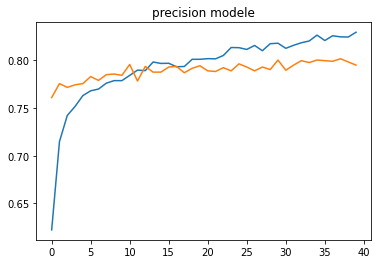

In [110]:
import matplotlib.pyplot as plt 
plt.plot(historique.history['acc'])
plt.plot(historique.history['val_acc'])
plt.title('precision modele')
plt.show()


In [111]:
x_entrainement.shape

(6002, 1000)

In [112]:
predictions = model.predict(padded_sequences)
plus_probable = predictions.argmax(1)

In [118]:
len(predictions)

7503

In [119]:
import random

In [129]:
index = random.randrange(len(predictions))
print(commentaires[index])
print('predictions: %d, label: %d'  %(plus_probable[index], ressentis[index]))

maaaaan i love love without tragedy by rihanna i wish she made the whole song
predictions: 0, label: 0


iateyourfood yikes. poor pup. what a weird violent storm.
predictions: 0, label: 1


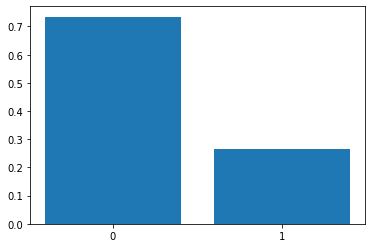

In [127]:


for i in range(1000):
  index = random.randrange(len(predictions))
  if plus_probable[index] != ressentis[index]:

    break
print(commentaires[index])
print('predictions: %d, label: %d'  %(plus_probable[index], ressentis[index]))
plt.bar(range(2), predictions[index], tick_label = range(2))
plt.show()